In [1]:
#importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import sklearn.datasets as datasets



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#importing the csv file of iris dataset
irisData = datasets.load_iris()
iris_df = pd.DataFrame(irisData.data, columns = irisData.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [24]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [26]:
iris_df.shape

(150, 4)

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

Text(0.5, 0, 'Petal Width (cm)')

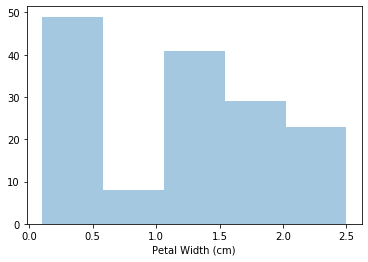

In [5]:
sns.distplot(a = iris_df['petal width (cm)'], kde = False)
plt.xlabel('Petal Width (cm)')

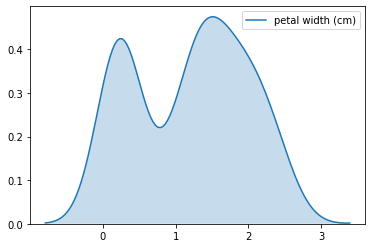

In [6]:
sns.kdeplot(data = iris_df['petal width (cm)'],shade = True)

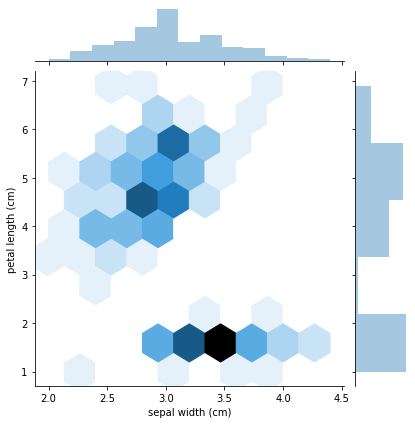

In [7]:
sns.jointplot(x=iris_df['sepal width (cm)'], y = iris_df['petal length (cm)'], kind = "hex")

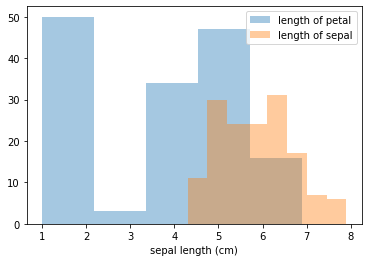

In [8]:
sns.distplot(a = iris_df['petal length (cm)'], label = 'length of petal', kde = False)
sns.distplot(a = iris_df['sepal length (cm)'], label = 'length of sepal', kde = False)
plt.legend()

In [9]:
#Independent variables
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
#Dependent Variable
target= irisData.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
#importing train test split to train and test the data.
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size = 0.3, random_state = 3)

In [12]:
X_train.shape

(105, 4)

In [13]:
#Importing decision tree classifier from scikit learn
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 400)
tree #shows default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=400, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
clf = tree.fit(iris_df,target)

In [15]:
#Predicting the species from the independent test variable data
pred_tree = tree.predict(X_test)
print(pred_tree[0:10])

[0 0 0 0 0 2 1 0 2 1]


In [16]:
#printing the actual species
print(y_test[0:10])

[0 0 0 0 0 2 1 0 2 1]


In [22]:
#Visualising  it through plot_tree() function
from sklearn import tree


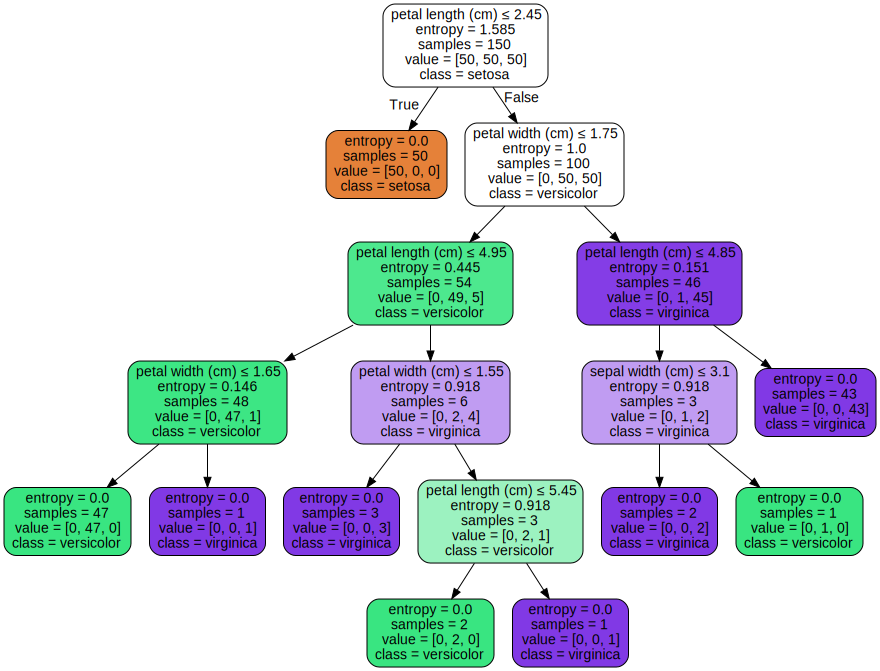

In [20]:

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 


#Plotting the data

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=irisData.feature_names,  
                      class_names=irisData.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph



In [21]:
#Calculating the accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  1.0
